In [8]:
#1. Trustworthiness of ratingsRatings are susceptible to manipulation, bias etc. 
#What can you say (quantitatively speaking) about the ratings in this dataset?

In [2]:
import re
review_stats = []

pattern ="reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if pattern in line:
            _, value = line.split(':', 1)
            numbers = re.findall(r': [0-9]+', value)
            numbers_clean = [float(x[1:].strip()) for x in numbers]
            ratings = {'total': numbers_clean[0],
                      'downloaded': numbers_clean[1],
                      'avg_rating': numbers_clean[2],}
            review_stats.append(ratings)

In [10]:
"here is: apples  ksjdnfksd: keys psoaskj:".split(':',1)

['here is', ' apples  ksjdnfksd: keys psoaskj:']

In [3]:
import pandas as pd
review_data =pd.DataFrame(review_stats)
review_data.head()

,avg_rating,downloaded,total
0,5.0,2.0,2.0
1,4.0,12.0,12.0
2,5.0,1.0,1.0
3,4.0,1.0,1.0
4,0.0,0.0,0.0


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
m = ols('avg_rating ~ downloaded',review_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3862.
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:17:22   Log-Likelihood:            -1.1290e+06
No. Observations:              542684   AIC:                         2.258e+06
Df Residuals:                  542682   BIC:                         2.258e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0438      0.003   1135.977      0.0

In [6]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

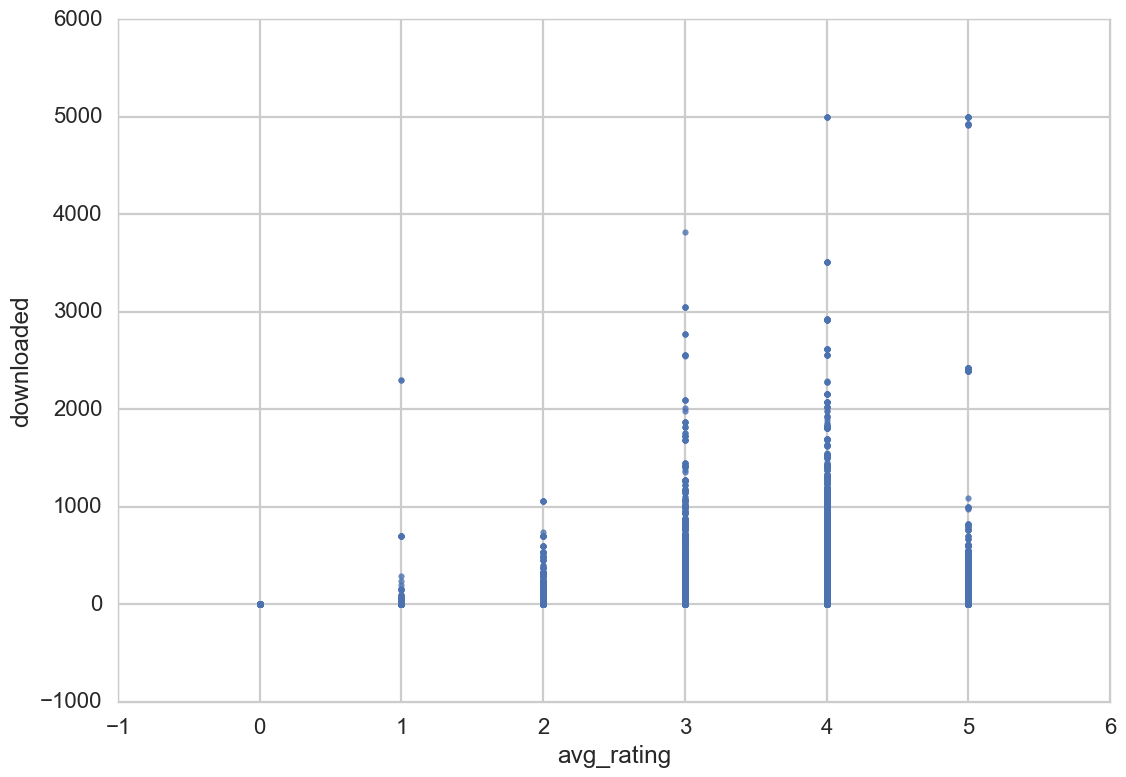

In [7]:
sns.regplot(y="downloaded", x="avg_rating", data=review_data, fit_reg = False)

In [ ]:
## the data demonstrates that those products with higher ratings have significantly more downloads.

In [ ]:
#2. Category bloatConsider the product group named 'Books'. 
#Each product in this group is associated with categories. 
#Naturally, with categorization, there are tradeoffs between how broad or specific the categories must be.

In [11]:
file_path = 'amazon-meta.txt'

In [12]:
items = []

with open(file_path) as f:
    info = set()
    we_are_in_categories = False
    item_count = 0
    for i, line in enumerate(f):
        
        if we_are_in_categories:
            if ':' in line:
                # we've now reached the end of categories
                we_are_in_categories = False
                continue
            set_ = set([l.strip().split('[', 1)[0]
                     for l in line.strip().split('|') if len(l.strip().split('[', 1)[0]) > 1])
            info = info.union(set_)
        
        elif 'categories:' in line:
            we_are_in_categories = True
        
        # reached the end of the item
        elif len(line.strip()) == 0:
            # Only save the categories if at least 1 was found
            if len(info) > 0:
                items.append(info)
                
            info = set()
            
            item_count += 1
            if item_count > 100:
                break

In [13]:
items[:3]

[{'Books',
  'Christianity',
  'Clergy',
  'Preaching',
  'Religion & Spirituality',
  'Sermons',
  'Subjects'},
 {'Books',
  'Earth-Based Religions',
  'Religion & Spirituality',
  'Subjects',
  'Wicca',
  'Witchcraft'},
 {'Books', 'Crafts & Hobbies', 'General', 'Home & Garden', 'Subjects'}]

In [22]:
all_combo = [
    tuple(sorted(combo))  # why am i doing this???
    for item in items
    for combo in list(combinations(item, 1))
]
#Counter(items).most_common()[:20]

In [23]:
all_combo[:5]

[('Preaching',),
 ('Christianity',),
 ('Subjects',),
 ('Clergy',),
 ('Religion & Spirituality',)]

In [28]:
Counter(all_combo).most_common()[:20]

[(('Books',), 81),
 (('Subjects',), 80),
 (('General',), 78),
 (('Amazon.com Stores',), 15),
 (("Children's Books",), 14),
 (('Specialty Stores',), 14),
 (('Literature & Fiction',), 13),
 (('Religion & Spirituality',), 11),
 (('Nonfiction',), 10),
 (('Christianity',), 9),
 (('Music',), 9),
 (('Reference',), 9),
 (('Literature',), 9),
 (('Home & Office',), 9),
 (('Categories',), 9),
 (('Styles',), 8),
 (('Business & Investing',), 8),
 (('United States',), 8),
 (('Business & Investing Books',), 8),
 (('Classics',), 8)]

In [32]:
sum(Counter(all_combo).values())   

1134

In [14]:
from itertools import combinations

In [15]:
all_combos = [
    tuple(sorted(combo))  # why am i doing this???
    for item in items
    for combo in list(combinations(item, 2))
]

In [16]:
all_combos[:5]

[('Christianity', 'Preaching'),
 ('Preaching', 'Subjects'),
 ('Clergy', 'Preaching'),
 ('Preaching', 'Religion & Spirituality'),
 ('Preaching', 'Sermons')]

In [17]:
from collections import Counter

In [20]:
Counter(all_combos).most_common()[:20]

[(('Books', 'Subjects'), 80),
 (('Books', 'General'), 63),
 (('General', 'Subjects'), 62),
 (('Amazon.com Stores', 'General'), 14),
 (('Books', "Children's Books"), 14),
 (("Children's Books", 'Subjects'), 13),
 (('Books', 'Literature & Fiction'), 13),
 (('General', 'Literature & Fiction'), 13),
 (('General', 'Specialty Stores'), 12),
 (('Literature & Fiction', 'Subjects'), 12),
 (('Amazon.com Stores', 'Books'), 11),
 (('Religion & Spirituality', 'Subjects'), 11),
 (('Books', 'Religion & Spirituality'), 11),
 (('Amazon.com Stores', 'Subjects'), 11),
 (('Books', 'Nonfiction'), 10),
 (('Nonfiction', 'Subjects'), 10),
 (("Children's Books", 'Literature'), 9),
 (('Literature', 'Subjects'), 9),
 (('Christianity', 'Subjects'), 9),
 (('Books', 'Home & Office'), 9)]

In [ ]:
### The data demonstrate that Categories 'Books', 'Subjects', and 'General' make up the majority of the category 
### combinations. Eliminating just one of these categories would eliminate 10% of of the category options.

In [ ]:
#1. Algorithm thinkingHow would build the product categorization fromscratch, using similar/co-purchased information? 

In [ ]:
## Categories would be made in hierarchy to group individual products into
## classes and families. Products that are bought frequently together and have similar descriptions could be grouped 
## together to create classes of categories.

In [ ]:
#2. Product thinkingNow, put on your 'product thinking' hat.
#a. Is it a good idea to show users the categorizationhierarchyfor items?

## The hierarchy of an item is mainly used by the company so that indivudal
## commodities represent unique instances of larger classes and families. 
## THe hierarchical organization allos the company to focus on the level
## of specificity that best suits a given situation. As such, this is not
## information that would directly benefit the customer

In [ ]:
#b. Is it a good idea to show users similar/co-purchased items?
## It is a good idea to show customers similar/co-purchased items as this
## may entice customers to make additional purchases that they may not
## have originally intended to make


In [ ]:
#c. Is it a good idea to show users reviews andratingsfor items?

## Reviews and ratings support the consumer and allow the consumer to 
## hear from others how well the product fit their needs. Showing consumers
## product ratings can increase consumer confidence in the product, and lead
## to more purchases